# Análise Trabalho T2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spo
np.set_printoptions(suppress=True, linewidth= 500)
from mpl_toolkits.axes_grid.inset_locator import inset_axes

/tmp/ipykernel_13067/2509053547.py:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


### Formatação de gráfico 

Fica aqui o código genérico para fazer um gráfico maravilhoso 

##### Código para mudar 

In [3]:
# --- Formatação da figura ---
cm          = 1/2.54  # centimeters in inches
figsize     = ( 16*cm, 10*cm )
dpi         = 100
fontsize        = 10
# --- Formação dos pontos ---
marker_type = "o"
markersize  = 2.5
# --- Transparência da grid ---
alpha_grid = 0.5 
# --- Formatação barras de erro --- 
color_bars    = "k"
alpha_bars    = 0.5
thickness     = 1 
head_size     = 1 
head_thick    = 0.2

### Funções

In [4]:
def makeplot(data, dt_label, color_mk, *errors, bars=False,):
    data_x, data_y = data[0], data[1]
    fig , ax = plt.subplots( figsize = figsize, dpi = dpi  ) 
    ax.legend( fontsize = fontsize)
    ax.set_xlabel( xlabel , fontsize = fontsize )
    ax.set_ylabel( ylabel , fontsize = fontsize )
    plt.grid( alpha = alpha_grid )
    plot_data = ax.plot( data_x , data_y , marker_type ,
                    label      = dt_label , 
                    markersize = markersize )
    plot_data[0].set_color(color_mk )
    if bars:
        errorbar = plt.errorbar( data_x , data_y ,
                                yerr       = errors[0][1] ,
                                xerr       = errors[0][0] , 
                                ls         ='', color = color_bars, alpha = alpha_bars ,
                                elinewidth = thickness, capsize = head_size,capthick   = 0.2 )
    plt.legend( fontsize = fontsize )
    plt.tight_layout()
    return fig, ax

def add_points(data, dt_label, color_mk, figure,*errors, bars= False):
    data_x, data_y = data[0], data[1]
    fig, ax = figure[0], figure[1]
    plot_data = ax.plot( data_x , data_y , marker_type ,
                    label      = dt_label , 
                    markersize = markersize )
    plot_data[0].set_color(color_mk )
    if bars:
        errorbar = plt.errorbar( data_x , data_y ,
                                yerr       = errors[0][1] ,
                                xerr       = errors[0][0] , 
                                ls         ='', color = color_bars, alpha = alpha_bars ,
                                elinewidth = thickness, capsize = head_size,capthick   = 0.2 )
    ax.legend( fontsize = fontsize )

def get_coef( x , y , f_fit , coef0 ):
    result = spo.curve_fit( f_fit , x , y , p0 = coef0 )
    return result[ 0 ]

def add_fit( ax , x , coef , f_fit , label="Fit",linestyle = "k--"):
    y_fit     = f_fit( x ,*coef )
    linewidth = 1
    alpha     = 0.5 
    if label != False:
        ax.plot( x , y_fit , linestyle , label = label, linewidth = linewidth , alpha = alpha  )
        ax.legend(  fontsize = fontsize )
    else:
         ax.plot( x , y_fit , linestyle , linewidth = linewidth , alpha = alpha )
    
    return ax , y_fit

def add_residues( x , y_fit , y , color, in_fig , *args ):
    if not in_fig: 
        fig , ax = plt.subplots( figsize = (figsize))
        ax.set_xlabel( xlabel )
        ax.set_ylabel( "Resíduos" )
        ax.legend( fontsize = 15)
    
    else : 
        fig = args[ 0 ]
        ax = args[ 1 ]
        #loc= args[2]
        ax = inset_axes(ax, width="30%", height="30%")
    
    res       = y - y_fit
    
    global max_res
    global min_res
    max_res, min_res = max(max_res, np.max(res)), min(min_res,np.min(res))
    ax.scatter( x , res ,color = color, marker='.' )
    ax.grid(True)
    ax.set_title("Resíduos")
    if in_fig:
        return ax     
    return fig , ax  

colors=['blue', 'green', 'magenta', 'black', 'cyan', 'yellow', 'red']
linestyles = ['b--', 'g--', 'm--', 'k--', 'c--', 'y--', 'r--']
max_res, min_res = 0, 0

# para guardar a imagem 
#fig.savefig( fig_name + ".png" )

In [5]:
freqs = np.transpose(np.genfromtxt("CSVs_T2/freqs.csv", delimiter = ",", skip_header=1))
H = 6.62607015e-34
W = 1.51 #ev
e = 1.602e-19

## Parte A

<div style="border:1px solid black;">
<span style="color:red; font-weight:bold;">Nota:</span> Vou optar por escolher o 1º ensaio na escala de 10nA para o LED 1 pelas razões da proximidade à célula fotoelétrica. Vou também desconsiderar as medições na escala 3nA para o LED 2 porque não são assim muito lineares e no laboratório vimos muita variação nas leituras do eletrómetro. Na conjugação final dos resultados vou eliminar o LED 6 e o 7 pelas razões da sensibilidade da célula e também pq não é possível colocá-los na mesma posição dos outros pq o suporte dos LEDs bate no suporte da célula.

In [6]:
xlabel = "V (V)"
ylabel = "I (nA)"
all_Vs = np.zeros(7)
all_u_Vs = np.zeros(7)

### Led 1

#### Dados

In [8]:
data= []
erros_1 = []
for i in range(1,8):
    source = "CSVs_T2/all/led" + str(i) + ".csv"
    data.append(np.transpose(np.genfromtxt(source, delimiter = ",", skip_header=1))[:2,])
title  = "Todos os LEDS"

#### Gráficos

No handles with labels found to put in legend.


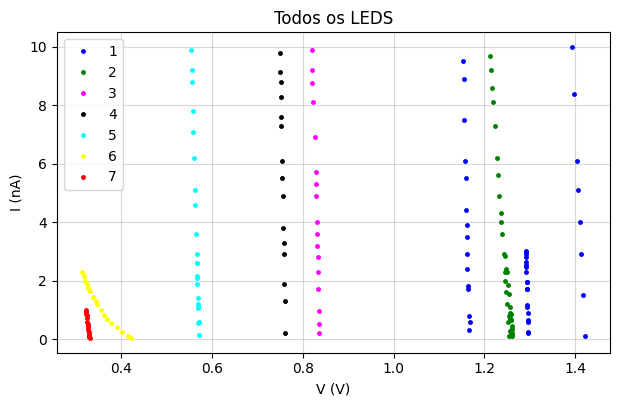

In [10]:
fig, ax = makeplot(data[0], '1' , colors[0], bars=False)
plt.title(title)

for i in range(1, len(data)):
    add_points(data[i], str(i+1), colors[i], [fig,ax])